In [19]:
import pandas as pd
import numpy as np

pd.set_option('display.precision',3)
df=pd.read_csv("../data/ch2_scores_em.csv")
scores = np.array(df["english"])[:10]
scores_df=pd.DataFrame({"english":scores}, index=pd.Index([chr(i) for i in range(65,75)], name="student"))
# 점수에서 평균값을 뺀 뒤, 표준편차 값으로 나누어 정규화 함
z = (scores - np.mean(scores)) / np.std(scores)
z

array([-1.40182605,  1.50965882,  0.10783277, -1.50965882,  0.21566555,
       -0.75482941,  1.07832773, -0.64699664,  1.07832773,  0.32349832])

In [20]:
# 이렇게 정규화한 항목들은 평균이 0이며(편차의 합은 0)
# 표준편차가 1이다(원래 표준편차의 값에 표준편차를 나누니, 1이 나온다)
np.mean(z), np.std(z, ddof=0)

(-1.6653345369377347e-17, 0.9999999999999999)

In [21]:
z = 50 + 10 * (scores - np.mean(scores)) / np.std(scores)
z

array([35.98173948, 65.09658825, 51.07832773, 34.90341175, 52.15665546,
       42.45170588, 60.78327732, 43.53003361, 60.78327732, 53.2349832 ])

In [22]:
scores_df['deviation value'] = z
scores_df

,english,deviation value
student,,
A,42,35.982
B,69,65.097
C,56,51.078
D,41,34.903
E,57,52.157
F,48,42.452
G,65,60.783
H,49,43.530
I,65,60.783


In [23]:
# 50명의 영어 점수 array
english_scores = np.array(df['english'])
# Series로 변환하여 describe를 표시
pd.Series(english_scores).describe()

count    50.00
mean     58.38
std       9.80
min      37.00
25%      54.00
50%      57.50
75%      65.00
max      79.00
dtype: float64

In [25]:
freq = np.histogram(english_scores, bins=10, range=(0, 100))
freq # 값이 두개가 나온다

(array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]))

In [26]:
freq[0] # 각 영역에 데이터가 몇개가 있는지 파악

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [28]:
# 0~10, 10~20, ... 이라는 문자열의 리스트를 작성
freq_class = [f'{i}~{i+10}' for i in range(0, 100, 10)]
# freq_class를 인덱스로 DataFrame을 작성
freq_dist_df = pd.DataFrame({'frequency':freq[0]},
                            index=pd.Index(freq_class,
                                           name='class'))
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [30]:
class_value = [(i+(i+10))//2 for i in range(0, 100, 10)] # 계급값
#[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]
rel_freq = freq[0] / freq[0].sum() # 상대도수
#array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])
cum_rel_freq = np.cumsum(rel_freq) # 누적상대도수
#[0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ]

In [31]:
# 계급값, 상대도수, 누적상대도수를 도수분포표에 추가
freq_dist_df['class value'] = class_value
freq_dist_df['relative frequency'] = rel_freq
freq_dist_df['cumulative relative frequency'] = cum_rel_freq
freq_dist_df = freq_dist_df[['class value', 'frequency',
                             'relative frequency', 'cumulative relative frequency']]

freq_dist_df

,class value,frequency,relative frequency,cumulative relative frequency
class,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


In [32]:
# frequency 중에 가장 숫자가 높은 행의 class value를 뽑아옴
# => 최빈값이 어떤 구간에 잘 나오는지 확인
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(), 'class value']

65

In [33]:
# Matplotlib의 pyplot 모듈을 plt라는 이름으로 임포트
import matplotlib.pyplot as plt

# 그래프가 notebook 위에 표시
%matplotlib inline

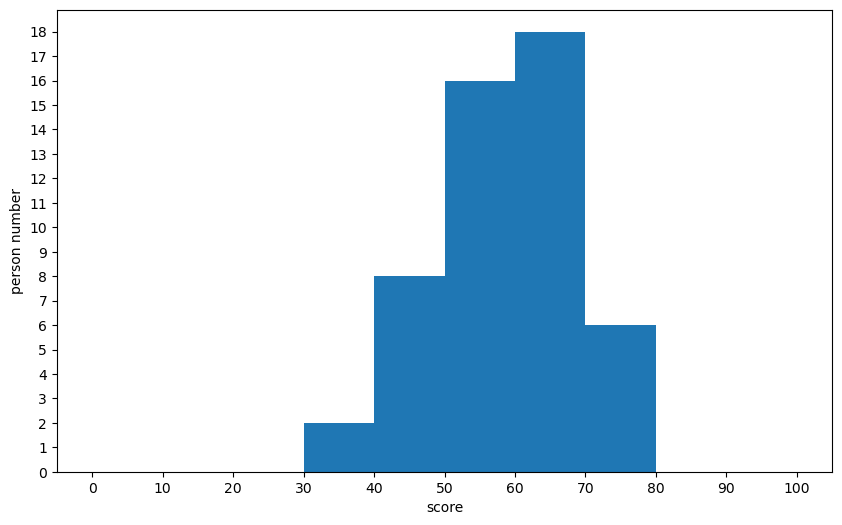

In [48]:
# 캔버스를 생성
# figsize로 가로・세로 크기를 지정
fig = plt.figure(figsize=(10, 6))
# 켄버스 위에 그래프를 그리기 위한 영역을 지정
# 인수는 영역을 1×1개 지정、하나의 영역에 그린다는 것을 의미
ax = fig.add_subplot(111)

# 계급수를 10으로 하여 히스토그램을 그림
freq, _, _ = ax.hist(english_scores, bins=10, range=(0, 100))
# y값, 범위 x값, BarContainer object 총 3개가 나온다

# X축에 레이블 부여
ax.set_xlabel('score')
# Y축에 레이블 부여
ax.set_ylabel('person number')
# X축을 0, 10, 20, ..., 100 눈금으로 구분
ax.set_xticks(np.linspace(0, 100, 10+1))
# 10+1 로 주는 이유 :  11개로 나눠야 깔끔하게 10씩 나눠지기 때문이다
# Y축을 0, 1, 2, ...의 눈금으로 구분
ax.set_yticks(np.arange(0, freq.max()+1))
# 그래프 표시
plt.show()

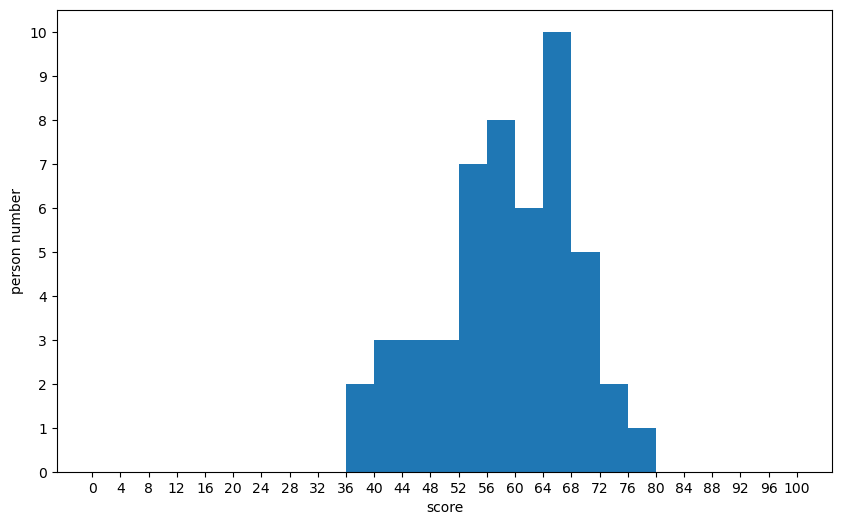

In [49]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

freq, _ , _ = ax.hist(english_scores, bins=25, range=(0, 100))
ax.set_xlabel('score')
ax.set_ylabel('person number')
ax.set_xticks(np.linspace(0, 100, 25+1))
ax.set_yticks(np.arange(0, freq.max()+1))
plt.show()

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)
# Y축의 스케일이 다른 그래프를 ax1과 동일한 영역에 생성
ax2 = ax1.twinx()

# 상대도수의 히스토그램으로 하기 위해서는, 도수를 데이터의 수로 나눌 필요가 있음
# 이것은 hist의 인수 weight를 지정하면 실현 가능
weights = np.ones_like(english_scores) / len(english_scores)
rel_freq, _, _ = ax1.hist(english_scores, bins=25,
                          range=(0, 100), weights=weights)

cum_rel_freq = np.cumsum(rel_freq) # 누적상대도수
class_value = [(i+(i+4))//2 for i in range(0, 100, 4)]
# 꺾은선 그래프를 그림
# 인수 ls를 '--'로 하면 점선이 그려짐
# 인수 marker를 'o'으로 하면 데이터 점을 그림
# 인수 color를 'gray'로 하면 회색으로 지정
ax2.plot(class_value, cum_rel_freq,
         ls='--', marker='o', color='gray')
# 꺾은선 그래프의 눈금선을 제거
ax2.grid(visible=False)

ax1.set_xlabel('score')
# 축을 지정해서 라벨을 각각 다르게 설정함
ax1.set_ylabel('relative frequency') 
ax2.set_ylabel('cumulative relative frequency')
ax1.set_xticks(np.linspace(0, 100, 25+1))

plt.show()

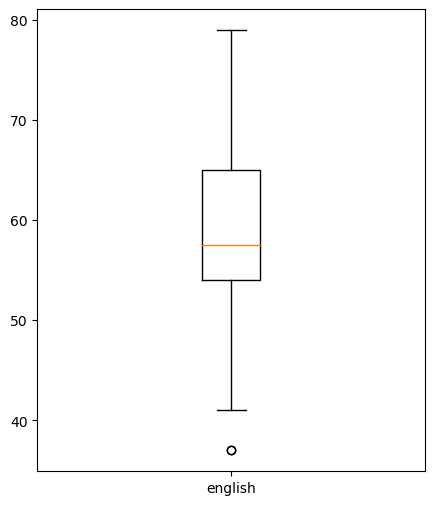

In [50]:
fig = plt.figure(figsize=(5, 6))
ax = fig.add_subplot(111)
ax.boxplot(english_scores, labels=['english'])

plt.show()

In [52]:
import numpy as np

# 예시 배열
original_array = np.array([[2, 3, 999], [5, 6, 7]])

# ones_like 함수를 사용하여 동일한 모양의 배열을 생성
ones_array = np.ones_like(original_array)

print(ones_array)


[[1 1 1]
 [1 1 1]]
